In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       int64
timestamp                                object
full_sq                                  int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                             object
sub_area                                 object
area_m                                   float64
raion_popul                              int64
green_zone_part                          float64
indust_part                              float64
children_preschool                       int64
preschool_quota    

In [6]:
ames = pd.read_csv('data/Ames_Housing_Sales.csv')

In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
1stFlrSF         1379 non-null float64
2ndFlrSF         1379 non-null float64
3SsnPorch        1379 non-null float64
Alley            1379 non-null object
BedroomAbvGr     1379 non-null int64
BldgType         1379 non-null object
BsmtCond         1379 non-null object
BsmtExposure     1379 non-null object
BsmtFinSF1       1379 non-null float64
BsmtFinSF2       1379 non-null float64
BsmtFinType1     1379 non-null object
BsmtFinType2     1379 non-null object
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtQual         1379 non-null object
BsmtUnfSF        1379 non-null float64
CentralAir       1379 non-null object
Condition1       1379 non-null object
Condition2       1379 non-null object
Electrical       1379 non-null object
EnclosedPorch    1379 non-null float64
ExterCond        1379 non-null object
ExterQual        1379 non-null object
Exterior1st    

In [9]:
X = ames[['GrLivArea']]

In [10]:
y = ames[['SalePrice']]

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
lm.fit(X, y)
preds = lm.predict(X)

In [13]:
X = ames[['GrLivArea', '1stFlrSF']]

In [14]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
corr = ames.corr()

In [16]:
corr['SalePrice'].nlargest(10)

SalePrice       1.000000
OverallQual     0.787228
GrLivArea       0.708172
GarageCars      0.637095
GarageArea      0.608405
TotalBsmtSF     0.603583
1stFlrSF        0.594935
FullBath        0.556550
TotRmsAbvGrd    0.538309
YearBuilt       0.507584
Name: SalePrice, dtype: float64

In [17]:
import seaborn as sns

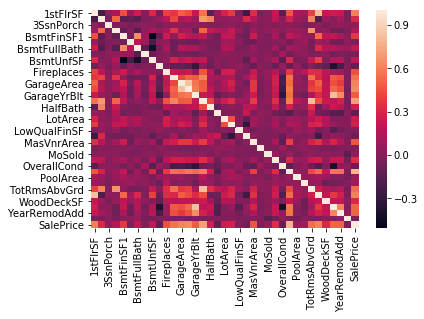

In [19]:
sns.heatmap(corr)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [21]:
ss = StandardScaler()

In [22]:
scaled = ss.fit_transform(X)

In [23]:
scaled

array([[ 0.33781599, -0.83006172],
       [-0.52546189,  0.21937391],
       [ 0.48426492, -0.66463344],
       ...,
       [ 1.55180052,  0.02809746],
       [-0.88002245, -0.25623238],
       [-0.53702365,  0.20386501]])

In [24]:
ridge = Ridge(alpha=0.1)

In [25]:
ridge.fit(scaled, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
X.head()

,GrLivArea,1stFlrSF
0,1710.0,856.0
1,1262.0,1262.0
2,1786.0,920.0
3,1717.0,961.0
4,2198.0,1145.0


In [28]:
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('polys', PolynomialFeatures(degree=2)), ('ridge', Ridge(alpha = 0.1))])

In [31]:
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polys', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [32]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'polys': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'ridge': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001)}

In [33]:
pipe.named_steps['ridge'].coef_

array([[     0.        ,  31426.80336979,  31808.24910067,
         19869.79230734, -40009.80238161,  15485.74083597]])

In [39]:
x = ames[['GrLivArea']]

In [40]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
x.shape

(1379, 1)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn = KNeighborsRegressor(n_neighbors=3)

In [44]:
knn.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [45]:
pred_knn = knn.predict(x)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
import numpy as np
knn_rmse = np.sqrt(mean_squared_error(y, pred_knn))

In [48]:
pred_lm = lm.predict(x)
lm_rmse = np.sqrt(mean_squared_error(y, pred_lm))

In [51]:
print('The KNN had {:.2f} RMSE and the Linear Model has {:.2f}'.format(knn_rmse, lm_rmse))

The KNN had 46012.82 RMSE and the Linear Model has 55773.78


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

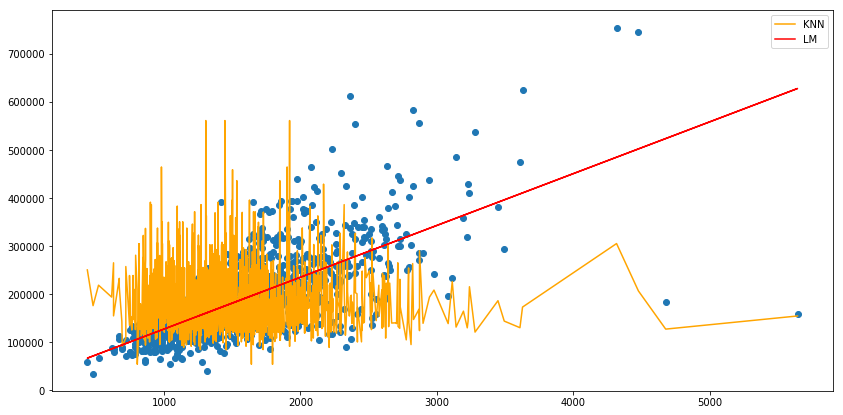

In [59]:
plt.figure(figsize = (14, 7))
x_sorted = x.sort_values(by = 'GrLivArea')
plt.scatter(x, y)
plt.plot(x_sorted, pred_knn, color = 'orange', label = 'KNN')
plt.plot(x, pred_lm, color = 'red', label = 'LM')
plt.legend(frameon = 'False')

In [57]:
x

,GrLivArea
0,1710.0
1,1262.0
2,1786.0
3,1717.0
4,2198.0
5,1362.0
6,1694.0
7,2090.0
8,1774.0
9,1077.0
